In [1]:
import os
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T
import torch.nn as nn
import torch.nn.functional as F
from datetime import datetime
import numpy as np

In [2]:
DATA_DIR = '..../Datasets/Celebrity Face Image Dataset/Celebrity Faces Dataset'
##/Users/orhan.erdal/git-files/Datasets/Celebrity Face Image Dataset/Celebrity Faces Dataset

In [3]:
DATA_DIR='/Users/orhan.erdal/git-files/Datasets/Celebrity Face Image Dataset/Celebrity Faces Dataset'

In [4]:
image_size = 64
batch_size = 32
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

In [5]:
all_ds = ImageFolder(DATA_DIR, transform=T.Compose([
    T.Resize(image_size),
    T.CenterCrop(image_size),
    T.ToTensor(),
    T.Normalize(*stats)
]))



In [6]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

In [8]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=8):
    for images, _ in dl:
        show_images(images, nmax)
        break

In [9]:
n = len(all_ds)  # total number of examples
n_test = int(0.1 * n)  # take ~10% for test
n,n_test

(1800, 180)

In [10]:
indices = list(range(n))

In [11]:
train_set, test_set = torch.utils.data.random_split(all_ds, [1600, 200])

In [12]:
#test_set = torch.utils.data.Subset(all_ds, range(n_test))  # take first 10%
#train_set = torch.utils.data.Subset(all_ds, range(n_test, n))  # take the rest

In [13]:
train_dl = DataLoader(train_set, batch_size, shuffle=True, num_workers=2, pin_memory=True)

In [14]:
test_dl = DataLoader(test_set, batch_size, shuffle=False, num_workers=2, pin_memory=True)

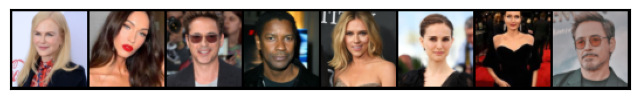

In [15]:
show_batch(train_dl)

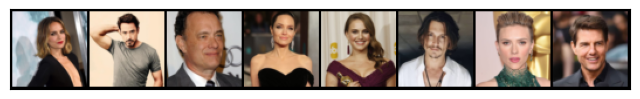

In [16]:
show_batch(test_dl)

In [17]:
for images, labels in test_dl:
    print(labels)


tensor([ 9, 11, 15,  0,  9,  5, 13, 14,  7,  3,  6,  9, 15,  8, 13,  7, 16, 14,
        15, 16,  7, 16, 15,  3,  8,  4, 13,  8,  1, 11, 13,  7])
tensor([13,  1, 11,  9, 15,  2,  9,  0, 15, 15, 11,  8, 11, 14,  7, 12,  0,  2,
        13,  4,  1,  1, 10,  8, 12,  6,  6,  2,  0,  4, 15, 11])
tensor([ 6,  7,  1, 16,  0, 13,  2,  7,  7,  3, 12,  2,  4, 15,  7,  2, 12, 16,
        12,  5, 14,  7, 11,  8,  0, 13, 13,  9, 12,  6,  5, 11])
tensor([ 4, 11, 13,  3,  7, 13,  3,  5,  5, 10,  9, 13, 16,  9,  1,  6,  6, 11,
         7,  1,  1, 13, 12, 14, 16, 16,  0, 10,  6,  4, 14,  6])
tensor([13, 15,  4,  7, 13,  7,  8,  7,  8,  0,  8,  1, 15, 12, 13, 16,  7, 13,
         0,  5,  2, 13,  4,  1,  7, 15,  4, 16, 11,  1, 14,  6])
tensor([14,  5,  7,  4, 14, 11, 13,  9,  4,  5,  8,  5,  2,  6, 11, 13,  2, 16,
        15, 10, 16, 13, 11, 12, 15,  1,  0, 13, 16, 13, 13,  6])
tensor([15, 16, 10, 13, 14, 15, 12,  0])


In [18]:
#nmax=16
#for batch_number, (images, labels) in enumerate(train_dl):
#    print(batch_number, labels[:nmax])
#    show_images(images, nmax)
#    break



In [19]:
images.shape

torch.Size([8, 3, 64, 64])

In [20]:
# Define the model
class CNN(nn.Module):
    def __init__(self, K,featureMap=16):
        super(CNN, self).__init__()


        # define the conv layers
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, featureMap, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(featureMap),
            nn.Conv2d(featureMap, featureMap, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(featureMap),
            nn.MaxPool2d(2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(featureMap, featureMap*2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(featureMap*2),
            nn.Conv2d(featureMap*2, featureMap*2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(featureMap*2),
            nn.MaxPool2d(2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(featureMap*2, featureMap*4, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(featureMap*4),
            nn.Conv2d(featureMap*4, featureMap*4, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(featureMap*4),
            nn.MaxPool2d(2),
        )

        self.conv4 = nn.Sequential(
            nn.Conv2d(featureMap*4, featureMap*8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(featureMap*8),
            nn.Conv2d(featureMap*8, featureMap*8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(featureMap*8),
            nn.MaxPool2d(2),
        )


        # Useful: https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d
        # H_out = H_in + 2p - 2 --> p = 1 if H_out = H_in

        # Easy to calculate output
        # 32 > 16 > 8 > 4
        #64 - 32 -16- 8-4

        # define the linear layers
        self.fc1 = nn.Linear(featureMap*8 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, K)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)

        x = x.view(x.size(0), -1)
        x = F.dropout(x, p=0.4)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.4)
        x = self.fc2(x)
        return x

In [21]:
K = len(set(all_ds.targets))
print("number of classes:", K)

number of classes: 17


In [22]:
model = CNN(K,featureMap=64)

In [23]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(device)
model.to(device)

mps


CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, 

In [24]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [25]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            # move data to GPU
            inputs, targets = inputs.to(device), targets.to(device)

            # print("inputs.shape:", inputs.shape)

            # zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            # print("about to get model output")
            outputs = model(inputs)
            # print("done getting model output")
            # print("outputs.shape:", outputs.shape, "targets.shape:", targets.shape)
            loss = criterion(outputs, targets)

            # Backward and optimize
            # print("about to optimize")
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item())

        # Get train loss and test loss
        train_loss = np.mean(train_loss) # a little misleading

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')

    return train_losses, test_losses

In [26]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_dl, test_dl, epochs=10)

Epoch 1/10, Train Loss: 3.4196,       Test Loss: 2.8420, Duration: 0:00:28.324992
Epoch 2/10, Train Loss: 2.5601,       Test Loss: 2.4300, Duration: 0:00:28.298607
Epoch 3/10, Train Loss: 2.3253,       Test Loss: 2.4139, Duration: 0:00:27.857803
Epoch 4/10, Train Loss: 2.2269,       Test Loss: 2.4427, Duration: 0:00:27.918010
Epoch 5/10, Train Loss: 2.1449,       Test Loss: 2.3804, Duration: 0:00:27.817344
Epoch 6/10, Train Loss: 2.0461,       Test Loss: 2.4308, Duration: 0:00:28.013616
Epoch 7/10, Train Loss: 1.9285,       Test Loss: 2.2665, Duration: 0:00:27.789818
Epoch 8/10, Train Loss: 1.8348,       Test Loss: 2.3006, Duration: 0:00:27.766959
Epoch 9/10, Train Loss: 1.7936,       Test Loss: 2.3204, Duration: 0:00:28.043072
Epoch 10/10, Train Loss: 1.6940,       Test Loss: 2.3899, Duration: 0:00:27.806217


0 tensor([ 9, 11, 15,  0,  9,  5, 13, 14,  7,  3,  6,  9, 15,  8, 13,  7])
tensor([[-3.1534e+00, -2.2303e-01,  2.3298e+00,  2.1057e+00, -4.8188e+00,
          1.0361e+00, -4.4940e+00,  6.5168e-01, -3.3045e+00, -4.0696e+00,
         -3.3949e+00,  2.6387e+00, -4.5818e+00, -2.9584e+00,  1.6417e+00,
         -1.6509e+00,  6.0195e-01],
        [-2.1217e+00,  6.9192e-01,  6.3340e-01,  1.5048e+00, -5.2016e-01,
          5.2260e-01, -1.8272e+00,  4.9873e-01, -2.8571e+00, -2.1826e+00,
         -3.3555e+00,  1.6315e+00, -2.6415e+00, -2.8912e+00,  9.9664e-01,
          1.2595e-01,  1.1289e-01],
        [-5.8633e+00,  4.0617e+00,  2.1327e+00,  2.7672e+00, -6.3217e+00,
         -4.3937e-01, -4.1215e+00,  6.9815e+00, -1.3845e+01, -7.4318e+00,
         -6.2610e+00, -1.0509e+00, -9.4021e+00, -9.8221e+00, -1.8186e+00,
          5.6206e+00,  5.5899e-01],
        [ 3.9246e+00, -2.1050e+00, -6.7126e+00, -4.5319e+00, -3.6861e-01,
         -4.7553e+00,  7.9798e-01, -3.1653e+00,  2.1446e+00,  1.6284e+00,
   

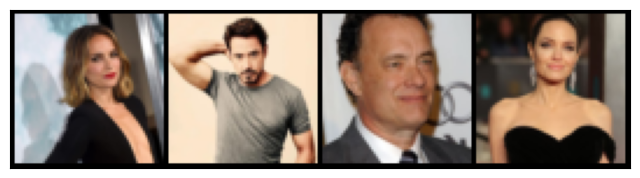

In [27]:
nmax=16
for batch_number, (images, labels) in enumerate(test_dl):
    print(batch_number, labels[:nmax])
    show_images(images, 4)
    inputs, targets = images.to(device), labels.to(device)
    output = model(inputs)
    print(output)
    print(targets[0])
    break

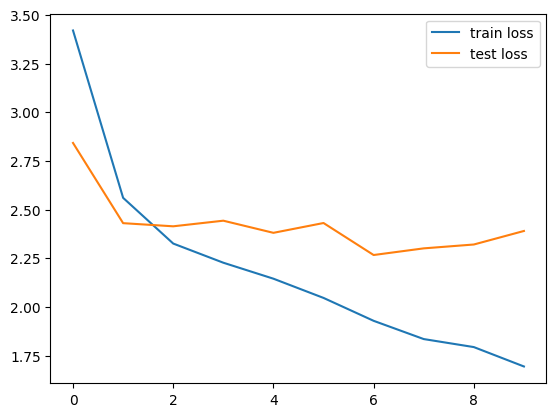

In [28]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [29]:
model.eval()
n_correct = 0.
n_total = 0.
for inputs, targets in train_dl:
    # Move to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_dl:
    # Move to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.4775, Test acc: 0.2250


In [30]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[ 3  0  0  1  1  0  0  0  2  0  0  0  1  1  1  1  0]
 [ 0  0  0  1  0  0  2  1  0  1  0  2  0  1  1  3  0]
 [ 0  0  3  2  0  0  0  2  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  1  0  1  0  0]
 [ 1  0  0  0  3  0  1  0  0  2  3  0  0  0  1  0  0]
 [ 1  0  0  1  0  0  0  1  0  0  0  4  0  0  2  0  0]
 [ 2  1  0  0  1  0  4  0  1  0  0  0  0  2  0  0  1]
 [ 0  1  0  4  0  1  0  6  0  0  1  1  0  0  0  2  2]
 [ 0  0  1  0  0  0  0  0  6  2  0  0  1  0  0  0  0]
 [ 3  0  1  0  1  0  0  0  1  1  0  0  0  0  2  0  0]
 [ 0  0  0  0  1  0  0  0  0  1  3  0  0  0  0  0  0]
 [ 0  0  1  3  0  0  0  2  1  0  0  5  0  0  2  0  0]
 [ 2  0  0  1  1  1  0  1  0  0  0  0  3  0  1  0  0]
 [ 6  0  0  0  4  0  3  0  0  0  0  1  1 10  0  0  0]
 [ 0  1  0  3  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  2  0  2  0  1  0  4  0  0  0  1  0  0  1  5  0]
 [ 1  1  3  2  0  0  1  1  0  1  0  3  0  0  0  0  1]]


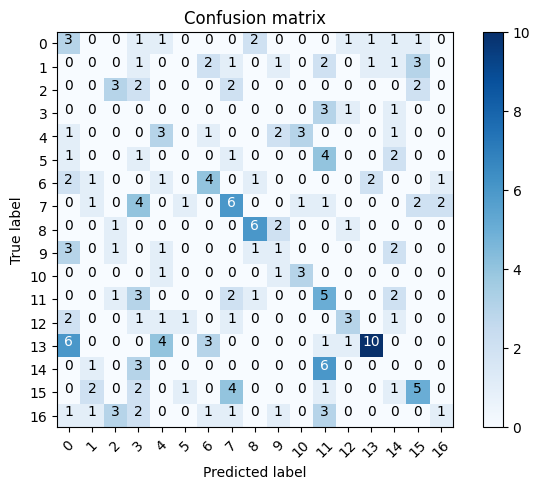

In [31]:
# get all predictions in an array and plot confusion matrix

#x_test = test_set.data
#y_test = np.array(test_set.targets)
#x_test= np.array([],ndmin=4)

y_test= np.array([])
p_test = np.array([])
for inputs, targets in test_dl:
    # Move to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    _, predictions = torch.max(outputs, 1)


    # update p_test

    p_test = np.concatenate((p_test, predictions.cpu().numpy()))
    y_test = np.concatenate((y_test, targets.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(17)))

In [32]:
test_set[0][0]

tensor([[[ 0.6235,  0.6314,  0.6784,  ...,  0.1529,  0.5216,  0.4118],
         [ 0.6471,  0.6471,  0.6706,  ...,  0.0275,  0.4118,  0.3490],
         [ 0.6706,  0.6706,  0.6784,  ..., -0.1059,  0.2471,  0.3098],
         ...,
         [ 0.6941,  0.6863,  0.6941,  ..., -0.9608, -0.9922, -0.8510],
         [ 0.6863,  0.6863,  0.6784,  ..., -0.9216, -0.9922, -0.9373],
         [ 0.6784,  0.6941,  0.6784,  ..., -0.8745, -0.9922, -0.9686]],

        [[ 0.6549,  0.6627,  0.7020,  ...,  0.3255,  0.5765,  0.4824],
         [ 0.6784,  0.6784,  0.6941,  ...,  0.2157,  0.5137,  0.4431],
         [ 0.7020,  0.7020,  0.7098,  ...,  0.0902,  0.3882,  0.4275],
         ...,
         [ 0.7255,  0.7176,  0.7255,  ..., -0.9686, -1.0000, -0.8510],
         [ 0.7176,  0.7176,  0.7098,  ..., -0.9294, -1.0000, -0.9373],
         [ 0.7098,  0.7255,  0.7020,  ..., -0.8902, -0.9922, -0.9765]],

        [[ 0.7490,  0.7647,  0.8039,  ...,  0.4353,  0.6627,  0.5686],
         [ 0.7725,  0.7725,  0.7961,  ...,  0

In [33]:
labels = '''angelina_jolie
Brad_pitt
denzel
hugh_jackman
jennifer_lawrance
johhny_deep
kate_winslet
leo
megan_fox
natalie_portman
nicole_kidman
robert_downey_jr
sandra_bullock
scarlett
tom_cruise
tom_hanks
will_smith'''.split()

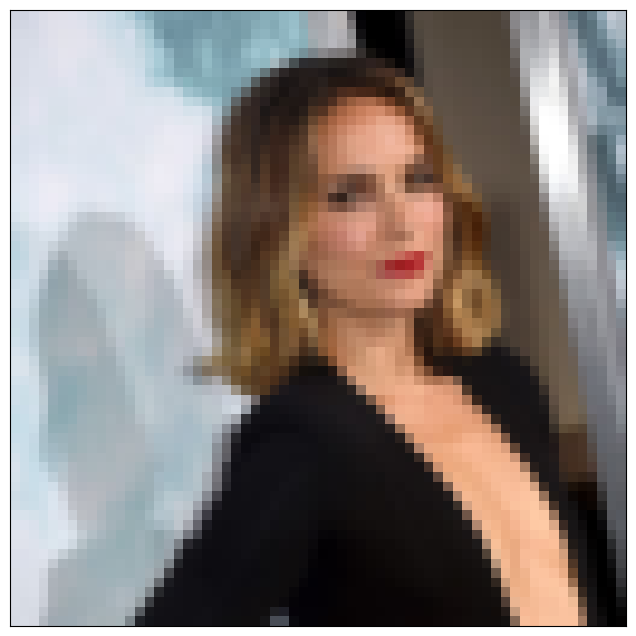

In [34]:
show_images((test_set[0][0]))

In [35]:
for i in range(200):
    print(p_test.astype(np.uint8)[i],y_test[i].astype(np.uint8))

2 9
3 11
15 15
0 0
9 9
0 5
6 13
11 14
5 7
14 3
8 6
8 9
15 15
12 8
0 13
10 7
0 16
11 14
7 15
11 16
3 7
9 16
7 15
11 3
8 8
4 4
13 13
8 8
11 1
11 11
6 13
7 7
13 13
3 1
8 11
14 9
15 15
15 2
4 9
8 0
1 15
7 15
7 11
8 8
11 11
3 14
7 7
14 12
3 0
3 2
4 13
6 4
6 1
15 1
10 10
8 8
7 12
6 6
0 6
2 2
0 0
10 4
3 15
3 11
13 6
16 7
11 1
1 16
13 0
0 13
7 2
15 7
3 7
11 3
0 12
3 2
4 4
14 15
7 7
2 2
12 12
16 16
0 12
11 5
11 14
7 7
3 11
2 8
12 0
13 13
0 13
0 9
12 12
6 6
11 5
11 11
10 4
7 11
13 13
12 3
7 7
0 13
11 3
14 5
3 5
10 10
14 9
12 13
2 16
0 9
15 1
4 6
6 6
14 11
1 7
13 1
9 1
4 13
5 12
11 14
11 16
3 16
4 0
9 10
13 6
0 4
11 14
0 6
6 13
15 15
9 4
3 7
13 13
7 7
8 8
3 7
9 8
14 0
8 8
15 1
1 15
3 12
13 13
2 16
15 7
13 13
15 0
11 5
2 2
13 13
14 4
6 1
11 7
11 15
4 4
3 16
11 11
7 1
3 14
1 6
11 14
14 5
16 7
10 4
3 14
11 11
4 13
0 9
9 4
7 5
9 8
11 5
15 2
6 6
14 11
0 13
7 2
11 16
7 15
10 10
2 16
11 13
2 11
4 12
3 15
14 1
8 0
4 13
7 16
0 13
13 13
16 6
5 15
6 16
4 10
13 13
1 14
15 15
12 12
0 0


9 0
66 1
73 2
90 3
86 4
143 5
72 6
51 7
34 8
10 9
177 10
130 11
13 12
63 13
75 14
35 15
30 16
106 17
163 18
14 19


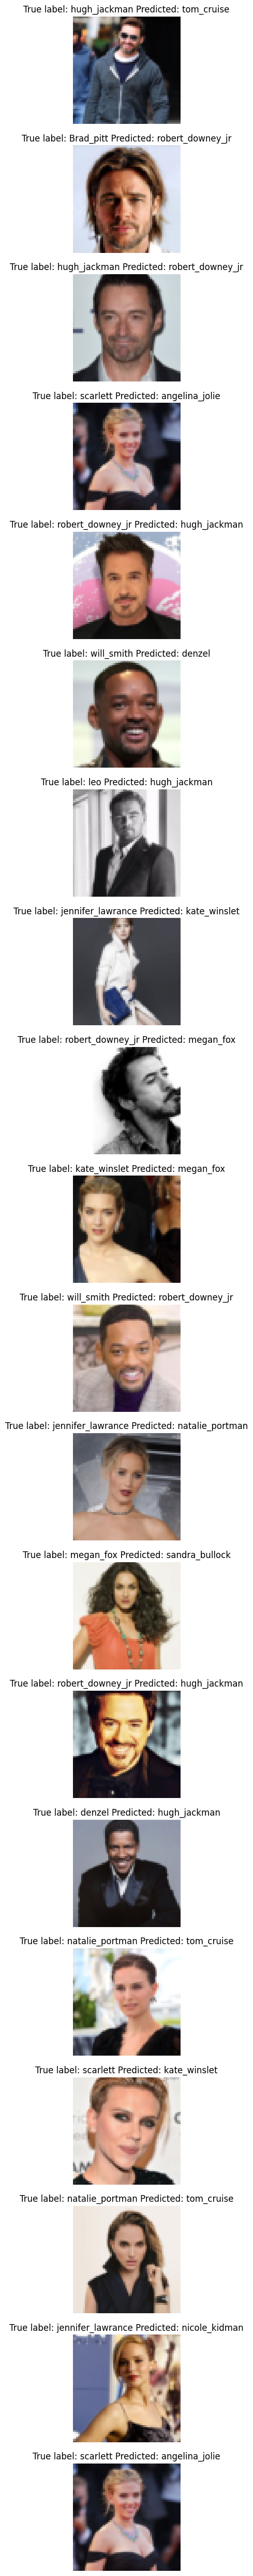

In [36]:
# Show some misclassified examples
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test.astype(np.uint8))[0]
sample_idx = np.random.choice(misclassified_idx, 20, replace=False)
plt.figure(figsize=(64,64))
for j, i in enumerate(sample_idx):
    print(i,j)
    plt.subplot(20, 1, j + 1)
    plt.axis('off')
    #plt.imshow((test_set[i][0]/2+0.5).reshape(64,64,3).numpy())
    plt.imshow(make_grid(denorm(test_set[i][0].detach()[:nmax]), nrow=8).permute(1, 2, 0))


    #y_test_labels=y_test[i]
    #print(test_set[i][0]/2+0.5)
    plt.title("True label: %s Predicted: %s" % (labels[int(y_test[i])], labels[int(p_test[i])]));